<a href="https://colab.research.google.com/github/alice9547/covid-19_model/blob/main/corona19_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

본 프로그램은 https://github.com/kairess/corona-virus-prediction의 
응용임을 밝힙니다.

In [13]:
import pandas as pd # 텍스트 입출력 및 데이터프레임 가공이 가능 한 라이브러리
import plotly.graph_objs as go # 그래프 라이브러리
import plotly.offline as py
from fbprophet import Prophet # 시계열 예측 라이브러리
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

import numpy as np #행렬이나 다차원 배열을 처리할때 사용하는 라이브러리


In [24]:
data = pd.read_csv('/corona19_testdata.csv')# pandas데이터 프레임을 이용하여 csv파일을 읽어옴
data.head()# 데이터가 잘 출력 되는지 5행만 출력해 살펴보며 확인

,date,Jongro,Jongro_add,Jung-gu,Jung-gu_add,Yongsan,Yongsan_add,Seongdong,Seongdong_add,KwangJin,KwangJin_add,Dongdaemun,Dongdaemun_add,Jungnang,Jungnang_add,Seongbuk,Seongbuk_add,Gangbuk,Gangbuk_add,Dobong,Dobong_add,Nowon,Nowon_add,Eunpyeong,Eunpyeong_add,Seodaemun,Seodaemun_add,Mapo,Mapo_add,Yangcheon,Yangcheon_add,Gangseo,Gangseo_add,Guro,Guro_add,Geumcheon,Geumcheon_add,Yeongdeungpo,Yeongdeungpo_add,Dongjak,Dongjak_add,Gwanak,Gwanak_add,Seocho,Seocho_add,Gangnam,Gangnam_add,Songpa,Songpa_add,Gangdong,Gangdong_add,etc,etc_add,time,daily_add
0,2021.11.08,2240,6,2208,12,3275,10,3455,16,4208,23,4818,24,4602,27,5000,21,3525,22,3375,18,5063,36,5341,42,3310,19,4487,17,4060,20,5515,29,6241,50,3032,19,5930,49,5016,19,6656,42,4979,26,8133,31,7847,46,5107,34,8818,51,11:43.0,709
1,2021.11.07,2234,12,2196,9,3265,12,3439,19,4184,24,4794,42,4574,27,4979,38,3503,18,3357,31,5027,45,5299,44,3291,12,4470,17,4040,31,5487,37,6192,48,3013,48,5881,49,4997,17,6614,54,4953,28,8102,34,7802,58,5073,53,8767,41,11:43.0,848
2,2021.11.06,2222,12,2187,19,3253,15,3420,24,4160,22,4752,40,4547,27,4941,35,3485,29,3326,40,4982,46,5255,53,3279,19,4453,14,4009,30,5451,46,6158,66,2965,40,5832,49,4980,28,6559,57,4925,38,8068,25,7744,51,5020,40,8712,51,11:43.0,916
3,2021.11.05,2210,15,2169,21,3238,18,3396,20,4139,21,4712,56,4519,23,4906,45,3456,27,3286,36,4936,49,5202,40,3260,18,4439,27,3979,31,5405,54,6092,74,2925,53,5783,64,4952,28,6502,48,4887,29,8043,24,7693,63,4980,28,8660,68,11:43.0,980
4,2021.11.04,2195,14,2148,14,3220,18,3376,16,4119,26,4656,57,4496,31,4861,49,3429,29,3250,17,4887,53,5162,46,3242,20,4412,22,3950,28,5350,44,6022,64,2872,37,5718,67,4924,31,6454,55,4858,21,8019,30,7630,62,4951,40,8588,55,11:43.0,946


In [25]:
dc = data.loc[  : ,  ['date','daily_add' ] ]#필요한 데이터는 날짜와 일일확진자수 이므로 이둘을 추출한다.
dc = dc.reset_index().rename(columns={'daily_add': 'daily_confirmed'}) #일일 확진자로  이름을 바꾼다.

dc.head()#값이 잘나오는지 헤더 출력으로  확인


,index,date,daily_confirmed
0,0,2021.11.08,709
1,1,2021.11.07,848
2,2,2021.11.06,916
3,3,2021.11.05,980
4,4,2021.11.04,946


In [26]:
#그래프를 그려보자 (Line plotly)
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=dc.date,
        y=dc.daily_confirmed,
        name='daily confirmed in Seoul '
    )
)

fig

prophet에 대한 자세한 내용 : https://facebook.github.io/prophet/docs/trend_changepoints.html

In [27]:
dc_prophet = dc.rename(columns={
    'date': 'ds',
    'daily_confirmed': 'y'
})

dc_prophet.head()

,index,ds,y
0,0,2021.11.08,709
1,1,2021.11.07,848
2,2,2021.11.06,916
3,3,2021.11.05,980
4,4,2021.11.04,946


In [36]:
m = Prophet(
    changepoint_prior_scale=0.5, # scale값을 증가시키면 더 유연해진다.
    changepoint_range=0.95, # 시계열의 첫 98%에 잠재적 변화점을 배치한다.
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=True,# 우리는 일일 확진자 증가만을 예측한다.
    seasonality_mode='additive'
)

m.fit(dc_prophet)

future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

fig = plot_plotly(m, forecast)
py.iplot(fig)

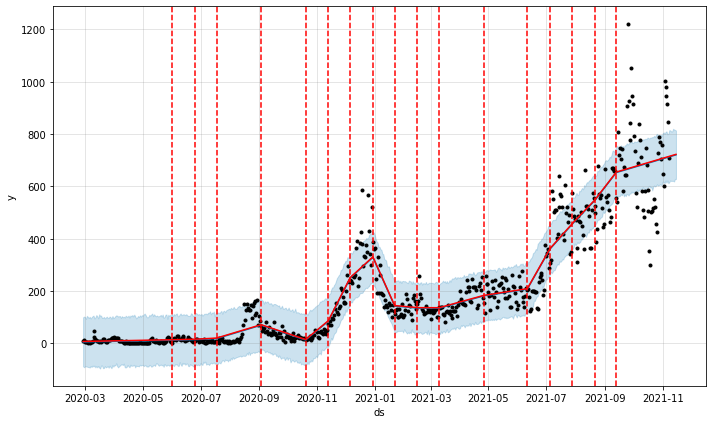

In [32]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)